# Algorytm schrege

W zadaniu należało zaimplementować algorytm schrege dla problemu RPQ.
Udało nam się zaimplementować wersje zarówno z przerwaniami jak i bez.
Implemntacje przeprowadziliśmy na podstawie pseudokodu zawartego w instrukcji.
Dodatkowo zaimplementowaliśmy wariant o złożoności obliczeniowej O(n*logn)
za pomocą kopca

In [16]:
import Load
import schrage

results = []
tasks = Load.readData("Data/in100.txt")
print(f"Schrege: {schrage.schrage(tasks)[1]}")
print(f"Schrege z Heapq: {schrage.schrage_heapq(tasks)[1]}")
print(f"Schrege z przerwaniami: {schrage.schrage_pmtn(tasks)}")
print(f"Schrege z przerwaniami z Heapq: {schrage.schrage_pmtn_heapq(tasks)}")

Schrege: 3076
Schrege z Heapq: 3076
Schrege z przerwaniami: 3070
Schrege z przerwaniami z Heapq: 3070


Wyniki działań są zgodne z oczekiwanymi które zostały nam podane w pliku

## Testy dla różnych instancji

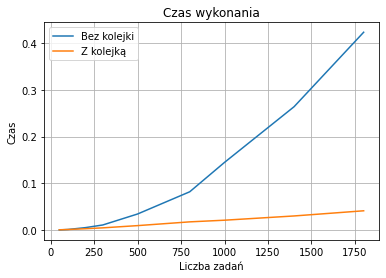

In [17]:
import random
from Task import Task
from time import perf_counter
import matplotlib.pyplot as plt
datset = []
# tmp = [50, 100, 200]
# for number in tmp:
#     datset.append(Load.readData(f"Data/in{number}.txt"))
length = [50, 100, 200, 300, 500, 800, 1000, 1400, 1800]
for i in length:
    tmp = []
    for n in range(1,i+1):
        tmp.append(Task(id=n, r=random.randint(0, 1000), p=random.randint(0, 1000), q=random.randint(0, 1000)))
    datset.append(tmp)

times1 = []
times2 = []
leng = [len(x) for x in datset]
for data in datset:
    start = perf_counter()
    schrage.schrage(data)
    times1.append(perf_counter()-start)

    start = perf_counter()
    schrage.schrage_heapq(data)
    times2.append(perf_counter()-start)

plt.plot(leng, times1, label="Bez kolejki")
plt.plot(leng, times2, label="Z kolejką")
plt.legend()
plt.grid()
plt.title("Czas wykonania")
plt.xlabel("Liczba zadań")
plt.ylabel("Czas")
plt.show()

Jak widzimy algorytm bez podziału zadań jest znacznie szybszy gdy skorzystamy
z kolejki priorytetowej na kopcu

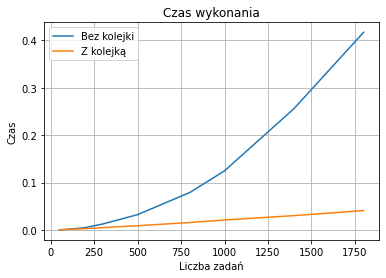

In [18]:
times1 = []
times2 = []
leng = [len(x) for x in datset]
for data in datset:
    start = perf_counter()
    schrage.schrage_pmtn(data)
    times1.append(perf_counter()-start)

    start = perf_counter()
    schrage.schrage_pmtn_heapq(data)
    times2.append(perf_counter()-start)

plt.plot(leng, times1, label="Bez kolejki")
plt.plot(leng, times2, label="Z kolejką")
plt.legend()
plt.grid()
plt.title("Czas wykonania")
plt.xlabel("Liczba zadań")
plt.ylabel("Czas")
plt.show()

Podobnie ma się sytuacja dla algorytmu z podziałem zadań